## 다중분류 - 아이리스
- 베스트 모델 콜백, 조기종료 콜백 사용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2023                
np.random.seed(seed)
tf.random.set_seed(seed)
import warnings
warnings.filterwarnings('ignore')

- 전처리

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
y_onehot = to_categorical(iris.target)
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, y_onehot, stratify=y_onehot, test_size=0.2, random_state=seed
) 

- 모델 정의/설정/학습/평가

In [4]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [5]:
model = Sequential([
    Dense(12, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                60        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 191 (764.00 Byte)
Trainable params: 191 (764.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Callback 함수
mc = ModelCheckpoint('models/iris_best.h5', monitor='val_loss', verbose=0,
                     save_best_only=True)
es = EarlyStopping(patience=20)     #monitor='val_loss'는 디폴트이므로 생략가능

In [8]:
hist = model.fit(X_train, y_train, validation_split=0.2, 
                 epochs=5000, batch_size=100, verbose=0,
                  callbacks=[mc, es] )

In [9]:
best_model = load_model('models/iris_best.h5')
best_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 153ms/step - loss: 0.7142 - accuracy: 0.9000


[0.7142377495765686, 0.8999999761581421]

- 시각화

In [10]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)
len(y_acc)

5000

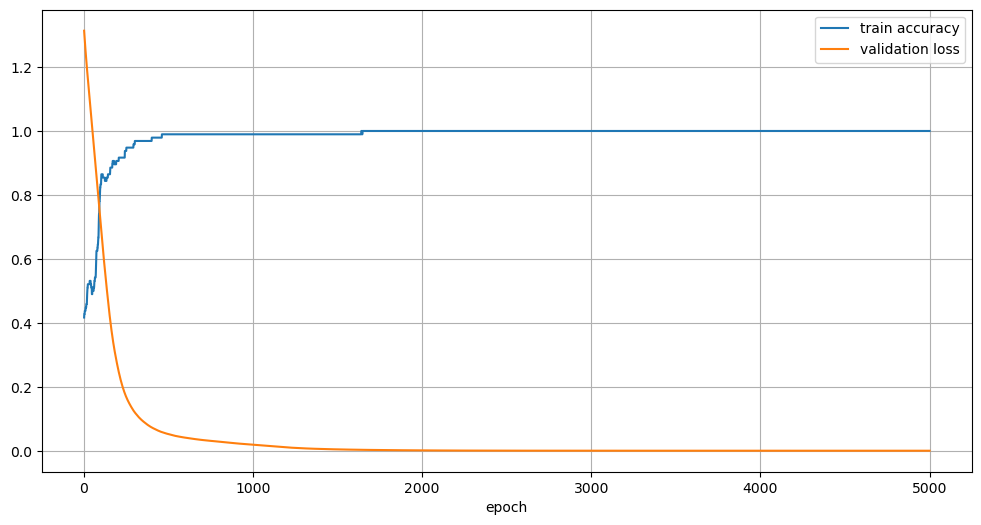

In [11]:
plt.figure(figsize=(12,6))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid(), plt.xlabel('epoch')
plt.show()